### Preliminaries

In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\packardbelll\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\packardbelll\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\packardbelll\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
f  = open("data.txt", "r")
text = f.read()

In [5]:
text[:1000]

"The Project Gutenberg EBook of Man to Man, by Jackson Gregory\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Man to Man\n\nAuthor: Jackson Gregory\n\nRelease Date: July 29, 2006 [EBook #18933]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK MAN TO MAN ***\n\n\n\n\nProduced by Al Haines\n\n\n\n\n\n\n\n\n\n\n[Frontispiece: The blazing heat was such that men and horses and steers\nsuffered terribly.]\n\n\n\n\n\n\nMAN TO MAN\n\n\nBY\n\nJACKSON GREGORY\n\n\n\nAUTHOR OF\n\nJUDITH OF BLUE LAKE RANCH, THE BELLS OF SAN JUAN, SIX FEET FOUR, ETC.\n\n\n\n\nILLUSTRATED BY\n\nJ. G. SHEPHERD\n\n\n\n\n\nGROSSET & DUNLAP\n\nPUBLISHERS -------- NEW YORK\n\n\n\n\nCOPYRIGHT, 1920, BY\n\nCHARLES SCRIBNER'S SONS\n\n\nPublished October, 1920\n\n\n\n\nCONTENTS\n\n\nCHAPTER

In [6]:
len(text)

436574

**Sentence Tokenize**

In [7]:
sentences = sent_tokenize(text.lower())

In [8]:
len(sentences)

5551

In [9]:
sentences[0:2]

['the project gutenberg ebook of man to man, by jackson gregory\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.',
 'you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or online at www.gutenberg.org\n\n\ntitle: man to man\n\nauthor: jackson gregory\n\nrelease date: july 29, 2006 [ebook #18933]\n\nlanguage: english\n\n\n*** start of this project gutenberg ebook man to man ***\n\n\n\n\nproduced by al haines\n\n\n\n\n\n\n\n\n\n\n[frontispiece: the blazing heat was such that men and horses and steers\nsuffered terribly.]']

**Word Tokenize within sentences with for loop**

In [11]:
corpus = []
for word in sentences:
    sent = word_tokenize(word)
    corpus.append(sent)

In [12]:
corpus[0:2]

[['the',
  'project',
  'gutenberg',
  'ebook',
  'of',
  'man',
  'to',
  'man',
  ',',
  'by',
  'jackson',
  'gregory',
  'this',
  'ebook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'at',
  'no',
  'cost',
  'and',
  'with',
  'almost',
  'no',
  'restrictions',
  'whatsoever',
  '.'],
 ['you',
  'may',
  'copy',
  'it',
  ',',
  'give',
  'it',
  'away',
  'or',
  're-use',
  'it',
  'under',
  'the',
  'terms',
  'of',
  'the',
  'project',
  'gutenberg',
  'license',
  'included',
  'with',
  'this',
  'ebook',
  'or',
  'online',
  'at',
  'www.gutenberg.org',
  'title',
  ':',
  'man',
  'to',
  'man',
  'author',
  ':',
  'jackson',
  'gregory',
  'release',
  'date',
  ':',
  'july',
  '29',
  ',',
  '2006',
  '[',
  'ebook',
  '#',
  '18933',
  ']',
  'language',
  ':',
  'english',
  '***',
  'start',
  'of',
  'this',
  'project',
  'gutenberg',
  'ebook',
  'man',
  'to',
  'man',
  '***',
  'produced',
  'by',
  'al',
  'haines',
  '[',
  'f

**Word Tokenization of Full Text**

In [13]:
corpus = word_tokenize(text.lower())

In [14]:
len(corpus)

97042

In [15]:
corpus[:15]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'man',
 'to',
 'man',
 ',',
 'by',
 'jackson',
 'gregory',
 'this',
 'ebook',
 'is']

**Tokenization with split function**

In [16]:
corpus_alt = text.lower().split()

In [17]:
len(corpus_alt)

78078

In [18]:
corpus_alt[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'man',
 'to',
 'man,',
 'by',
 'jackson']

**Removing punctuations and numbers and chars like "*", "#"**

In [19]:
corpus_1 = [w for w in corpus if w.isalpha()]

In [20]:
len(corpus_1)

77105

In [21]:
corpus_1[0:15]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'man',
 'to',
 'man',
 'by',
 'jackson',
 'gregory',
 'this',
 'ebook',
 'is',
 'for']

**Removing Stopwords**

In [22]:
# Load stop words
stop_words = stopwords.words('english')

In [23]:
# Remove stop words
corpus_2 = [word for word in corpus_1 if word not in stop_words]

In [24]:
len(corpus_2)

38117

In [25]:
corpus_2[0:20]

['project',
 'gutenberg',
 'ebook',
 'man',
 'man',
 'jackson',
 'gregory',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost',
 'restrictions',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'terms']

**Stemming with stemmer and lemmatizer**

In [26]:
st = PorterStemmer()

In [27]:
# Apply stemmer
corpus_3 = [st.stem(word) for word in corpus_2]

In [28]:
len(corpus_3)

38117

In [30]:
corpus_3[0:20]

['project',
 'gutenberg',
 'ebook',
 'man',
 'man',
 'jackson',
 'gregori',
 'ebook',
 'use',
 'anyon',
 'anywher',
 'cost',
 'almost',
 'restrict',
 'whatsoev',
 'may',
 'copi',
 'give',
 'away',
 'term']

In [31]:
lem = WordNetLemmatizer()

In [32]:
# Apply lemmatizer
corpus_4 = [lem.lemmatize(word) for word in corpus_2]

In [33]:
corpus_4[0:20]

['project',
 'gutenberg',
 'ebook',
 'man',
 'man',
 'jackson',
 'gregory',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost',
 'restriction',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'term']

**Joining**

In [37]:
corpus_4[:20]

['project',
 'gutenberg',
 'ebook',
 'man',
 'man',
 'jackson',
 'gregory',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost',
 'restriction',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'term']

In [38]:
original = " ".join(corpus_4)

In [39]:
original[:100]

'project gutenberg ebook man man jackson gregory ebook use anyone anywhere cost almost restriction wh'

**Part of Speech Tagging(PoST)**

In [40]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\packardbelll\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [41]:
text="Steven Paul Jobs (/dʒɒbz/; February 24, 1955 – October 5, 2011) was an American business magnate, industrial designer, investor, and media proprietor. He was the chairman, chief executive officer (CEO), and co-founder of Apple Inc., the chairman and majority shareholder of Pixar, a member of The Walt Disney Company's board of directors following its acquisition of Pixar, and the founder, chairman, and CEO of NeXT. Jobs is widely recognized as a pioneer of the personal computer revolution of the 1970s and 1980s, along with Apple co-founder Steve Wozniak."

In [44]:
text_tokens=nltk.word_tokenize(text.lower())
tokens_without_punc = [w for w in text_tokens if w.isalpha()]
tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]

In [45]:
" ".join(text_cleaned)

'steven paul job february october american business magnate industrial designer investor medium proprietor chairman chief executive officer ceo apple chairman majority shareholder pixar member walt disney company board director following acquisition pixar founder chairman ceo next job widely recognized pioneer personal computer revolution along apple steve wozniak'

In [46]:
tagged = nltk.pos_tag(text_cleaned)

In [47]:
# Show parts of speech
tagged

[('steven', 'NN'),
 ('paul', 'NNS'),
 ('job', 'NN'),
 ('february', 'JJ'),
 ('october', 'JJ'),
 ('american', 'JJ'),
 ('business', 'NN'),
 ('magnate', 'NN'),
 ('industrial', 'JJ'),
 ('designer', 'NN'),
 ('investor', 'NN'),
 ('medium', 'NN'),
 ('proprietor', 'NN'),
 ('chairman', 'NN'),
 ('chief', 'JJ'),
 ('executive', 'JJ'),
 ('officer', 'NN'),
 ('ceo', 'NN'),
 ('apple', 'NN'),
 ('chairman', 'NN'),
 ('majority', 'NN'),
 ('shareholder', 'NN'),
 ('pixar', 'NN'),
 ('member', 'NN'),
 ('walt', 'NN'),
 ('disney', 'NN'),
 ('company', 'NN'),
 ('board', 'NN'),
 ('director', 'NN'),
 ('following', 'VBG'),
 ('acquisition', 'NN'),
 ('pixar', 'FW'),
 ('founder', 'NN'),
 ('chairman', 'NN'),
 ('ceo', 'VBP'),
 ('next', 'JJ'),
 ('job', 'NN'),
 ('widely', 'RB'),
 ('recognized', 'VBN'),
 ('pioneer', 'NN'),
 ('personal', 'JJ'),
 ('computer', 'NN'),
 ('revolution', 'NN'),
 ('along', 'IN'),
 ('apple', 'NN'),
 ('steve', 'VBP'),
 ('wozniak', 'NN')]

**NER (Named Entity Recognition)**

In [49]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\packardbelll\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.


True

In [53]:
from nltk import pos_tag
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\packardbelll\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [54]:
named_ent = nltk.ne_chunk(tagged)

In [55]:
print(named_ent)

(S
  steven/NN
  paul/NNS
  job/NN
  february/JJ
  october/JJ
  american/JJ
  business/NN
  magnate/NN
  industrial/JJ
  designer/NN
  investor/NN
  medium/NN
  proprietor/NN
  chairman/NN
  chief/JJ
  executive/JJ
  officer/NN
  ceo/NN
  apple/NN
  chairman/NN
  majority/NN
  shareholder/NN
  pixar/NN
  member/NN
  walt/NN
  disney/NN
  company/NN
  board/NN
  director/NN
  following/VBG
  acquisition/NN
  pixar/FW
  founder/NN
  chairman/NN
  ceo/VBP
  next/JJ
  job/NN
  widely/RB
  recognized/VBN
  pioneer/NN
  personal/JJ
  computer/NN
  revolution/NN
  along/IN
  apple/NN
  steve/VBP
  wozniak/NN)


In [57]:
#named_ent.draw()

**Most common words**

In [35]:
from collections import Counter

In [36]:
print(Counter(corpus_4).most_common(5))

[('steve', 542), ('packard', 541), ('blenham', 524), ('man', 445), ('terry', 409)]


**WordCloud**

In [58]:
#!pip install wordcloud

In [61]:
from wordcloud import WordCloud

In [62]:
wordcloud = WordCloud(background_color = "white", max_words = 500)

In [70]:
wordcloud.generate(original)

In [64]:
import matplotlib.pyplot as plt

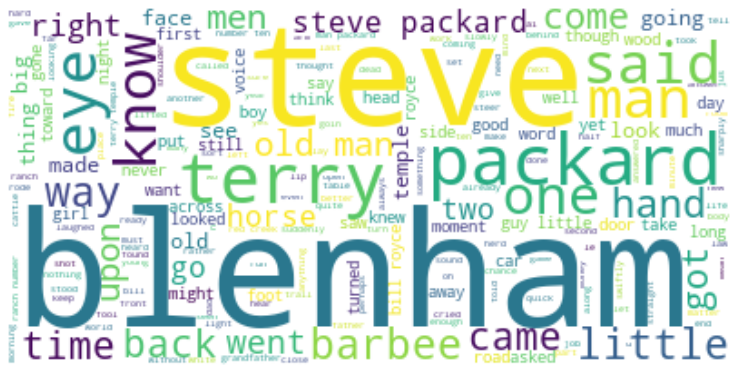

In [71]:
plt.figure(figsize = (13,13))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show();